In [1]:
import numpy as np
from os import listdir
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import urllib3
import scipy.optimize as opt
from scipy.special import factorial
import matplotlib.gridspec as gridspec
import seawater as sw
import time 
import datetime 
from datetime import timedelta
from datetime import datetime
import cmocean
from math import radians, sin, cos, atan2, sqrt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import ticker
from math import nan, isnan
from shapely.geometry.polygon import LinearRing


In [2]:
#load argo data

argo_lon=[]; argo_lat=[]; argo_time=[];argo_names=[]; argo_GBanks_time=[]; 
argo_shelf_names=[]; argo_retro_names=[] ; argo_neither_names=[];argo_depths=[]

#lon
df1 = pd.read_csv('/aos/home/ltalbot/Summer_2022/longitude.csv') 
df1=df1.to_numpy()

for i in range(len(df1)):
    r= df1[i][1:]
    argo_lon.append( r[~np.isnan(r)])
    
#lat 
df2 = pd.read_csv('/aos/home/ltalbot/Summer_2022/latitude.csv') 
df2=df2.to_numpy()

for i in range(len(df2)):
    r= df2[i][1:]
    argo_lat.append( r[~np.isnan(r)])

#time
df3 = pd.read_csv('/aos/home/ltalbot/Summer_2022/time.csv')
df3=df3.to_numpy()

for i in range(len(df3)):
    r= (df3[i][1:])
    argo_time.append(r)
    
    
#time when enters the Grand Banks box 
df4 = pd.read_csv('/aos/home/ltalbot/Summer_2022/GBanks_time.csv')
df4=df4.to_numpy()

for i in range(len(df4)):
    r= (df4[i][1:])
    argo_GBanks_time.append( r)

#shelf_names
df5 = pd.read_csv('/aos/home/ltalbot/Summer_2022/shelf_names.csv') 
df5=df5.to_numpy()

for i in range(len(df5)):
    argo_shelf_names.append(int(df5[i][1:]))
    
#retro names
df6 = pd.read_csv('/aos/home/ltalbot/Summer_2022/retro_names.csv')  
df6=df6.to_numpy()

for i in range(len(df6)):
    argo_retro_names.append( int(df6[i][1:])) 
    
#neither names 
df7 = pd.read_csv('/aos/home/ltalbot/Summer_2022/neither_names.csv')  
df7=df7.to_numpy()

for i in range(len(df7)):
    argo_neither_names.append(int(df7[i][1:]))
    
#names
df8 = pd.read_csv('/aos/home/ltalbot/Summer_2022/names.csv')  
df8=df8.to_numpy()

for i in range(len(df8)):
    argo_names.append(int(df8[i][1:]))
    
#argo_depth
df8 = pd.read_csv('/aos/home/ltalbot/Summer_2022/argo_depths.csv')  
df8=df8.to_numpy()

argo_depths=[]
for i in range(len(df8)):
    argo_depths.append(int(df8[i][1:]))

In [3]:
#load RAFOS data 

rafos_lon=[]; rafos_lat=[]; rafos_time=[];rafos_names=[];rafos_GBanks_time=[] ;rafos_pres=[]

#time
df3 = pd.read_csv('/aos/home/ltalbot/Summer_2022/RAFOS_time.csv')
df3=df3.to_numpy()

for i in range(len(df3)):
    r= (df3[i][1:])
    rafos_time.append(r)
    
#lon
df1 = pd.read_csv('/aos/home/ltalbot/Summer_2022/RAFOS_longitude.csv') 
df1=df1.to_numpy()

for i in range(len(df1)):
    r= df1[i][1:]
    rafos_lon.append( r)
    
#lat 
df2 = pd.read_csv('/aos/home/ltalbot/Summer_2022/RAFOS_latitude.csv') 
df2=df2.to_numpy()

for i in range(len(df2)):
    r= df2[i][1:]
    rafos_lat.append( r)

   
#names
df8 = pd.read_csv('/aos/home/ltalbot/Summer_2022/RAFOS_names.csv')  
df8=df8.to_numpy()

for i in range(len(df8)):
    rafos_names.append(int(df8[i][1:]))
    
#Grand Banks time 

df9 = pd.read_csv('/aos/home/ltalbot/Summer_2022/RAFOS_GBanks_time.csv')  
df9=df9.to_numpy()

for i in range(len(df9)):
    rafos_GBanks_time.append(int(df9[i][1:]))
    
#pressure 

df10 = pd.read_csv("/aos/home/ltalbot/Summer_2022/RAFOS_pressure.csv")
df10=df10.to_numpy()

for i in range(len(df9)):
    rafos_pres.append((df10[i][1:]))

    

In [4]:
#convert RAFOS pressure to depth 
rafos_depth=[]
for i in range(len(rafos_names)):
    rafos_depth.append(np.average(sw.dpth(rafos_pres[i],rafos_lat[i])))

/aos/home/mathilde/miniconda3/envs/Mython3/lib/python3.7/site-packages/seawater/eos80.py:512: RuntimeWarning: invalid value encountered in sin
  X = np.sin(lat * deg2rad)


In [5]:
#download the drifter data

drifter_lon=[]; drifter_lat=[]; drifter_time=[];drifter_names=[];drifter_GBanks_time=[];drifter_depth=[]

#time
df3 = pd.read_csv('/aos/home/ltalbot/Summer_2022/good_drifter_time.csv')
df3=df3.to_numpy()

for i in range(len(df3)):
    r= (df3[i][1:])
    drifter_time.append(r)
    


#lon
df1 = pd.read_csv('/aos/home/ltalbot/Summer_2022/good_drifter_longitude.csv') 
df1=df1.to_numpy()

for i in range(len(df1)):
    r= df1[i][1:]
    drifter_lon.append( r)
    
#lat 
df2 = pd.read_csv('/aos/home/ltalbot/Summer_2022/good_drifter_latitude.csv') 
df2=df2.to_numpy()

for i in range(len(df2)):
    r= df2[i][1:]
    drifter_lat.append( r)

   
#names
df8 = pd.read_csv('/aos/home/ltalbot/Summer_2022/good_drifter_names.csv')  
df8=df8.to_numpy()

for i in range(len(df8)):
    drifter_names.append(int(df8[i][1:]))
    
    
#Grand Banks time
df9 = pd.read_csv('/aos/home/ltalbot/Summer_2022/good_drifter_GBanks_time.csv')  
df9=df9.to_numpy()

for i in range(len(df9)):
    drifter_GBanks_time.append(int(df9[i][1:]))
 
#drifter_depth
drifter_depth= [0] * len(drifter_names)
    


/aos/home/mathilde/miniconda3/envs/Mython3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8563,8564,8565,8566,8567,8568,8569,8570,8571,8572,8573,8574,8575,8576,8577,8578,8579,8580,8581,8582,8583,8584,8585,8586,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618,8619,8620,8621,8622,8623,8624,8625,8626,8627,8628,8629,8630,8631,8632,8633,8634,8635,8636,8637,8638,8639,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649,8650,8651,8652,8653,8654,8655,8656,8657,8658,8659,8660,8661,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671,8672,8673,8674,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711,8712,8713,8714,8715,8716,8717,8718,8719,8720,8721,8722,8723,8724,8725,8726,8727,8728,8729,8730,8731,8732,8733,8734,8735,87

In [6]:
#shorten the funky drifter trajectories 

drifter_lon[62]= [drifter_lon[62][x] for x in range(1,4000)] 
drifter_lat[62]= [drifter_lat[62][x] for x in range(1,4000)]
drifter_lon[0]= [drifter_lon[0][x] for x in range(1,7700)]
drifter_lat[0]= [drifter_lat[0][x] for x in range(1,7700)]
drifter_lon[2]= [drifter_lon[2][x] for x in range(1,6000)]
drifter_lat[2]= [drifter_lat[2][x] for x in range(1,6000)]

In [7]:
#shorten Argo trajectories under GLORYS12 line 

short_argo_lon=[];short_argo_lat=[];short_argo_names=[]
argo_new_lon=[];argo_new_lat=[];argo_good_j3=[]

for i in range(len(argo_lat)):     
    if (argo_names[i]!= 4901747 and argo_names[i] != 4901752 and argo_names[i] != 6901589 
    and argo_names[i]!= 6901001 and argo_names[i]!= 6901022):

        short_argo_names.append(argo_names[i]); argo_new_lon.append(argo_lon[i]); argo_new_lat.append(argo_lat[i])
        for j in range(len(argo_lat[i])):
            if int(50.5) <= int(argo_lat[i][j]) <= int(54):
                argo_good_j3.append(j) 
                break 

short_argo_lon=[]; short_argo_lat=[] #for the trajectories of the corrected files                 
                
for i in range(len(argo_new_lon)):     
    arr_lon=[];arr_lat=[]
    for j in range(len(argo_new_lon[i])):
        if j >= (argo_good_j3[i]):  
            arr_lon.append(argo_new_lon[i][j])
            arr_lat.append(argo_new_lat[i][j])

    short_argo_lon.append(arr_lon); short_argo_lat.append(arr_lat)

        
                      
for i in range(len(argo_lat)):                             
    if argo_names[i] == 4901752:
        arr_lon=[];arr_lat=[]
        for j in range(len(argo_lat[i])):
            if j >= (88):  
                arr_lon.append(argo_lon[i][j])
                arr_lat.append(argo_lat[i][j])

short_argo_lon.append(arr_lon); short_argo_lat.append(arr_lat); short_argo_names.append(4901752)  

for i in range(len(argo_lat)): 
    if argo_names[i] == 6901589:
        arr_lon=[];arr_lat=[]
        for j in range(len(argo_lat[i])):
            if j >= (134):  
                arr_lon.append(argo_lon[i][j])
                arr_lat.append(argo_lat[i][j])

short_argo_lon.append(arr_lon); short_argo_lat.append(arr_lat); short_argo_names.append(6901589)   

for i in range(len(argo_lat)):                            
    if argo_names[i] == 6901001:
        arr_lon=[];arr_lat=[]
        for j in range(len(argo_lat[i])):
            if j >= (81):  
                arr_lon.append(argo_lon[i][j])
                arr_lat.append(argo_lat[i][j])

short_argo_lon.append(arr_lon); short_argo_lat.append(arr_lat); short_argo_names.append(6901001)  

for i in range(len(argo_names)):
    if argo_names[i] == 4901747:
        arr_lon=[];arr_lat=[]
        for j in range(len(argo_lon[i]) ): 
            
            if 61 <= int(j) <= (130):  
                arr_lon.append(argo_lon[i][j])
                arr_lat.append(argo_lat[i][j])

        short_argo_lon.append(arr_lon); short_argo_lat.append(arr_lat); short_argo_names.append(4901747)  
        
     
for i in range(len(argo_names)):
    if argo_names[i] == 6901022:
        arr_lon=[];arr_lat=[]
        for j in range(len(argo_lon[i]) ): 
            
            if 330 <= int(j) :  
                arr_lon.append(argo_lon[i][j])
                arr_lat.append(argo_lat[i][j])

        short_argo_lon.append(arr_lon); short_argo_lat.append(arr_lat); short_argo_names.append(6901022)  
   

In [8]:
#shorten drifters under GLORYS12 line 

drifter_good_j=[] 
for i in range(len(drifter_lon)):
    for j in range(len(drifter_lat[i])):
            if (44) <= (drifter_lat[i][j]) <= (54):
                drifter_good_j.append(j) 
                break 
            
short_drifter_lon=[]; short_drifter_lat=[] #for the trajectories of the corrected files                 
                
for i in range(len(drifter_lat)):     
    arr_lon=[];arr_lat=[]
    for j in range(len(drifter_lat[i])):
        if j >= (drifter_good_j[i]):  
            arr_lon.append(drifter_lon[i][j])
            arr_lat.append(drifter_lat[i][j])

    short_drifter_lon.append(arr_lon); short_drifter_lat.append(arr_lat)


In [9]:
#combine all of the trajectories 

names=short_argo_names+rafos_names+drifter_names
lat=short_argo_lat+rafos_lat+short_drifter_lat
lon=short_argo_lon+rafos_lon+short_drifter_lon
depth = argo_depths + rafos_depth+ drifter_depth  

In [10]:
#Sort into categories 

west_names=[];west_2_retro_names=[];retro_names=[]; straight_names=[];x=[];y=[]
garbage=[]; lab_names=[]

for i in range(len(lon)):
        
        #manually had to change some  
        if (names[i] == 1555 or names[i] == 1556  or names[i] == 66716 or names[i] == 4901154 or names[i] == 4901401
            or names[i] == 25482 or names[i] ==36777):
            garbage.append(names[i])
            
        
        elif  (names[i] == 21443 or  names[i] == 52258 or names[i] == 55311 or names[i] == 60202920 
                or  names[i] ==4901405 or  names[i] ==6900638 or  names[i] ==64502410):
            west_2_retro_names.append(names[i]);x.append(lon[i]); y.append(lat[i])
            
        elif ( names[i] ==1560 or names[i] ==1582 or names[i] ==61516840 or names[i] ==1594
             or names[i] ==1901218 or names[i] ==4901093 or names[i] ==1558 or names[i] ==1561
              or names[i] ==1581 or names[i] ==1595 or names[i] ==1597 or names[i] ==36776 or names[i] ==1583):
            straight_names.append(names[i]); 
            
        elif (names[i] == 4900680 or names[i] == 4901748 or names[i] == 4901133 or names[i] ==4900430
              or names[i] ==5903397 or names[i] == 4901091 or names[i] ==6901001 
              or names[i] ==6900557 or names[i] ==5904988 or names[i] ==6900491 or names[i] ==6900973 
              or names[i] ==4901780 or names[i] == 4901747 or names[i] == 4901169 or names[i] ==4901753 
              or names[i] ==6900388 or names[i] ==4901402 or names[i] ==4900125 
              or names[i] ==1553 or names[i] ==1563 or names[i] ==1602 or names[i] ==76810):    
             retro_names.append(names[i])
    
        #west
        elif any(lon[i][j] > -70 and lon[i][j] < -52 and lat[i][j] < 47 for j in range(len(lon[i]))):
    
            west_names.append(names[i])
            
        #west then retro    
            if lon[i][-1] > -50:
                west_2_retro_names.append(names[i]);x.append(lon[i]); lat.append(lat[i])
            
      
        #stays in LC
        elif any( lon[i][j] < -48 and lat[i][j] > 55 for j in range(-20,-1)):
            lab_names.append(names[i]) 
        
        #retro
        elif any( lon[i][j] > -54 and lon[i][j] <-35 and lat[i][j] > 35 and lat[i][j] < 47
                 for j in range(-10,-1)):   
            straight_names.append(names[i])
        #straight
        else:
            retro_names.append(names[i])
            

         

In [11]:
#fix the holes in some of the trajectories

for i in range(len(lon)):
    lon[i][lon[i] == np.inf] = np.nan
    lat[i][lat[i] == np.inf] = np.nan
    lon[i] = [x for x in lon[i] if isnan(x) == False]
    lat[i] = [x for x in lat[i] if isnan(x) == False]

/aos/home/mathilde/miniconda3/envs/Mython3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/aos/home/mathilde/miniconda3/envs/Mython3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/aos/home/mathilde/miniconda3/envs/Mython3/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/aos/home/mathilde/miniconda3/envs/Mython3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings

PermissionError: [Errno 13] Permission denied: '/aos/home/ltalbot/Summer_2022/cluster_paper_grid_depth.png'

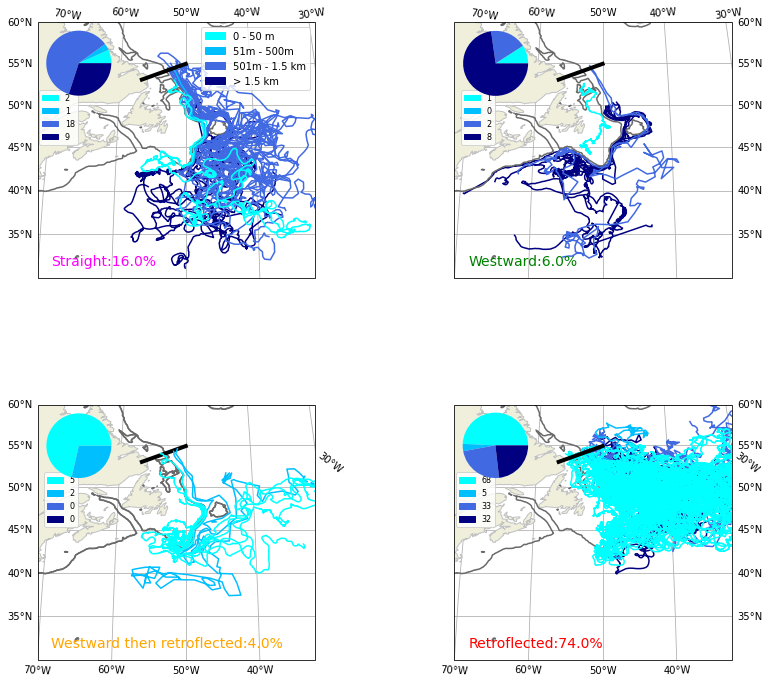

In [12]:
#make grid plot sorted by depth 

fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection':ccrs.Robinson(central_longitude=-50)},figsize=(12,12))#Ensures there is space between our plots
plt.subplots_adjust(hspace=0.00000005)



axs=axs.flatten()
bathy = xr.open_dataset('/storage3/shared/Glorys12/GLO-MFC_001_030_mask_bathy.nc')
bathy = bathy.deptho
lonb = bathy.longitude
latb = bathy.latitude
xb, yb = np.meshgrid(lonb, latb)

##straight##

axs[0].coastlines(color='silver')
axs[0].gridlines(zorder=-1)
axs[0].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[0].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[0].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)


gl = axs[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False



#plot the line where Glorys12 data starts
axs[0].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=5)  


#sort and plot 
count0=0;sfc0=0; upLC0=0; lowLC0=0;deep0=0
for i in range(len(names)):
    if names[i] in (straight_names):
        count0+=1
        if 0 <= depth[i] <=50: 
            axs[0].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc0+=1
        elif 50 < depth[i] <=500: 
            axs[0].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC0+=1
        elif 500 <depth[i] <= 1500: 
            axs[0].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC0+=1
        else : 
            axs[0].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep0+=1
      
axs[0].text(0.05, 0.05, 'Straight:' + str(round(count0/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[0].transAxes, fontsize=14,
            color='magenta')    
    
###pie chart###

ax_sub = inset_axes(axs[0], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc0,upLC0,lowLC0,deep0])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  
plt.tight_layout()


##text for pie chart##
yr_0 = mpatches.Patch(color='cyan', label=str(sfc0))
yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC0))
yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC0))
yr_3 = mpatches.Patch(color='navy', label= str(deep0)) 
axs[0].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.16,0.75),fontsize=8)









##west##

axs[1].coastlines(color='silver')
axs[1].gridlines(zorder=-1)
axs[1].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[1].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[1].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)


gl = axs[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.xlabels_bottom = False
gl.ylabels_left=False
gl.xlines = False
gl.ylines = False



#plot the line where Glorys12 data starts
axs[1].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=5)  

#sort and plot 
count1=0;sfc1=0; upLC1=0; lowLC1=0;deep1=0
for i in range(len(names)):
    if names[i] in (west_names):
        count1+=1
        if 0 <= depth[i] <=50: 
            axs[1].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc1+=1
        elif 50 < depth[i] <=500: 
            axs[1].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC1+=1
        elif 500 <depth[i] <= 1500: 
            axs[1].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC1+=1
        else: 
            axs[1].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep1+=1
      
              
axs[1].text(0.05, 0.05, 'Westward:' + str(round(count1/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[1].transAxes, fontsize=14,
            color='green')


###pie chart###

ax_sub = inset_axes(axs[1], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc1,upLC1,lowLC1,deep1])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  
plt.tight_layout()


##text for pie chart##
yr_0 = mpatches.Patch(color='cyan', label=str(sfc1))
yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC1))
yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC1))
yr_3 = mpatches.Patch(color='navy', label= str(deep1)) 


axs[1].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.16,0.75),fontsize=8)








##west 2 retro##

axs[2].coastlines(color='silver')
axs[2].gridlines(zorder=-1)
axs[2].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[2].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[2].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)

gl = axs[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.ylabels_right = False
gl.xlabels_top=False
gl.xlines = False
gl.ylines = False


#plot the line where Glorys12 data starts
axs[2].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=2)  

axs[2].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)

#sort and plot 
count2=0;sfc2=0; upLC2=0; lowLC2=0;deep2=0
for i in range(len(names)):
    if names[i] in (west_2_retro_names):
        count2+=1
        if 0 <= depth[i] <=50: 
            axs[2].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc2+=1
        elif 50 < depth[i] <=500: 
            axs[2].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC2+=1
        elif 500 <depth[i] <= 1500: 
            axs[2].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC2+=1
        else: 
            axs[2].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep2+=1
      
             
     
        
axs[2].text(0.05, 0.05, 'Westward then retroflected:' + str(round(count2/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[2].transAxes, fontsize=14,
            color='orange')
 
###pie chart###

ax_sub = inset_axes(axs[2], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc2,upLC2,lowLC2,deep2])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  
plt.tight_layout()


##text for pie chart##
yr_0 = mpatches.Patch(color='cyan', label=str(sfc2))
yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC2))
yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC2))
yr_3 = mpatches.Patch(color='navy', label= str(deep2)) 
axs[2].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.16,0.75),fontsize=8)








##retro##

axs[3].coastlines(color='silver')
axs[3].gridlines(zorder=-1)
axs[3].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[3].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[3].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)


gl = axs[3].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.ylabels_left=False
gl.xlabels_top=False
gl.xlines = False
gl.ylines = False


#plot the line where Glorys12 data starts
axs[3].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=5)  

#sort and plot 
count3=0;sfc3=0; upLC3=0; lowLC3=0;deep3=0
for i in range(len(names)):
    if names[i] in (retro_names):
        count3+=1
        if 0 <= depth[i] <=50: 
            axs[3].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc3+=1
        elif 50 < depth[i] <=500: 
            axs[3].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC3+=1
        elif 500 <depth[i] <= 1500: 
            axs[3].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC3+=1
        else: 
            axs[3].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep3+=1
          
            
axs[3].text(0.05, 0.05, 'Retroflected:' + str(round(count3/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[3].transAxes, fontsize=14,
            color='red')

###pie chart###

ax_sub = inset_axes(axs[3], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc3,upLC3,lowLC3,deep3])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  
plt.tight_layout()

##text for pie chart##
yr_0 = mpatches.Patch(color='cyan', label=str(sfc3))
yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC3))
yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC3))
yr_3 = mpatches.Patch(color='navy', label= str(deep3)) 
axs[3].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.16,0.75),fontsize=8)



##depth legned##                        
from matplotlib.legend import Legend    
leg = Legend(axs[0],
             [mpatches.Patch(color='cyan'),mpatches.Patch(color='deepskyblue'),mpatches.Patch(color='royalblue'),mpatches.Patch(color='navy')] ,
                                                         labels = ['0 - 50 m','51m - 500m','501m - 1.5 km','> 1.5 km'],loc='upper right',fontsize=10)
axs[0].add_artist(leg)






plt.savefig('/aos/home/ltalbot/Summer_2022/cluster_paper_grid_depth', dpi=300)


NameError: name 'texts' is not defined

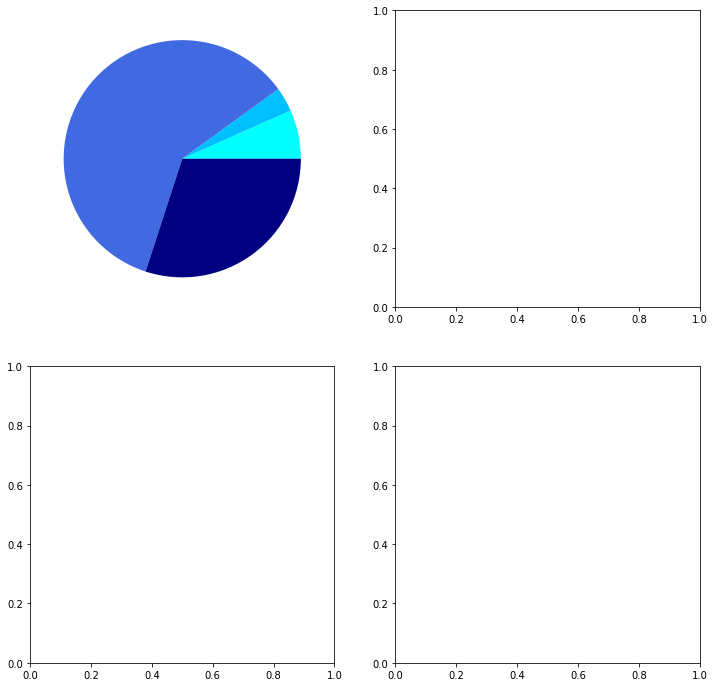

In [25]:
##plot of just pie charts 

fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12)) #ax1,ax2 refer to your two pies

c=['cyan','deepskyblue','royalblue','navy']

#straight
y = np.array([sfc0,upLC0,lowLC0,deep0])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']



patches, autotexts= axs[0,0].pie(y, colors = c)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
axs[0,0].axis('equal')  
plt.tight_layout()
axs[0,0].text(-0.4,1.1, 'Straight:' + str(round(count0/(len(names)-len(garbage)),2)*100)+ '%', fontsize=20,
            color='magenta')
axs[0,0].legend(labels=labels, fontsize=15, loc = 'upper left')
#west
y = np.array([sfc1,upLC1,lowLC1,deep1])

patches, autotexts = axs[0,1].pie(y, colors = c)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
axs[0,1].axis('equal')  
plt.tight_layout()
axs[0,1].text(-0.4,1.1, 'Westward:' + str(round(count1/(len(names)-len(garbage)),2)*100)+ '%',color='green',fontsize=20)

#west 2 retroflect 

y = np.array([sfc2,upLC2,lowLC2,deep2])

patches, autotexts = axs[1,0].pie(y, colors = c)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
axs[1,0].axis('equal')  
plt.tight_layout()
axs[1,0].text(-0.9,1.1, 'Westward then retroflected:' + str(round(count2/(len(names)-len(garbage)),2)*100)+ '%', fontsize=20,
            color='orange')

#retro

y = np.array([sfc3,upLC3,lowLC3,deep3])

patches, autotexts= axs[1,1].pie(y, colors = c)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')
# Equal aspect ratio ensures that pie is drawn as a circle
axs[1,1].axis('equal')  
plt.tight_layout()
axs[1,1].text(-0.5,1.1, 'Retroflected:' + str(round(count3/(len(names)-len(garbage)),2)*100)+ '%', fontsize=20,
            color='red')

plt.savefig('/aos/home/ltalbot/Summer_2022/cluster_paper_pie', dpi=300)


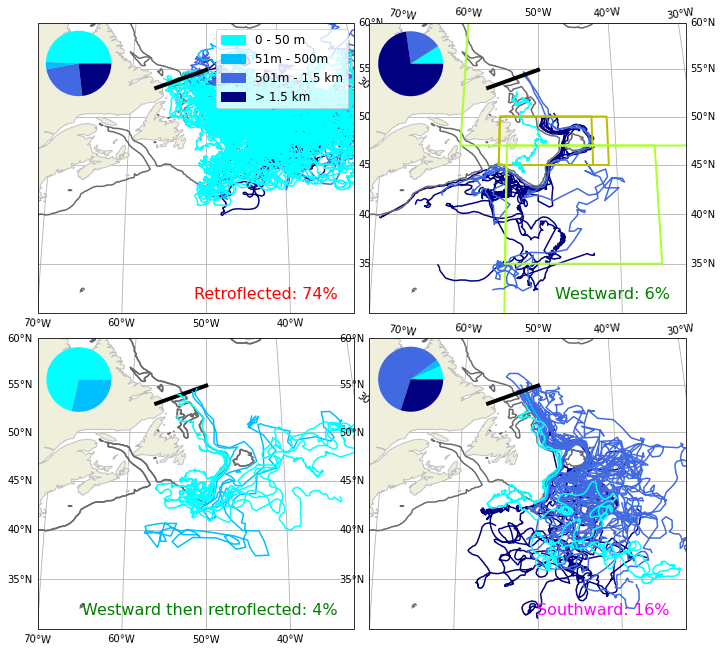

In [14]:
fig, axs = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection':ccrs.Robinson(central_longitude=-50)},figsize=(10,10))#Ensures there is space between our plots

axs=axs.flatten()
bathy = xr.open_dataset('/storage3/shared/Glorys12/GLO-MFC_001_030_mask_bathy.nc')
bathy = bathy.deptho
lonb = bathy.longitude
latb = bathy.latitude
xb, yb = np.meshgrid(lonb, latb)

fs = 16 # fontsize

##straight##

axs[3].coastlines(color='silver')
axs[3].gridlines(zorder=-1)
axs[3].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[3].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[3].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)


gl = axs[3].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False



#plot the line where Glorys12 data starts
axs[0].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=5)  

#sort and plot 
count0=0;sfc0=0; upLC0=0; lowLC0=0;deep0=0
for i in range(len(names)):
    if names[i] in (straight_names):
        count0+=1
        if 0 <= depth[i] <=50: 
            axs[3].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc0+=1
        elif 50 < depth[i] <=500: 
            axs[3].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC0+=1
        elif 500 <depth[i] <= 1500: 
            axs[3].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC0+=1
        else : 
            axs[3].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep0+=1
      
axs[3].text(0.95, 0.05, 'Retroflected: ' + '%d'%(round(count3/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[0].transAxes, fontsize=fs,
            color='r', ha='right')    
    
###pie chart###

ax_sub = inset_axes(axs[3], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc0,upLC0,lowLC0,deep0])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  


##text for pie chart##
#yr_0 = mpatches.Patch(color='cyan', label=str(sfc0))
#yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC0))
#yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC0))
#yr_3 = mpatches.Patch(color='navy', label= str(deep0)) 
#axs[0].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.2,0.78),fontsize=12)









##west##

axs[1].coastlines(color='silver')
axs[1].gridlines(zorder=-1)
axs[1].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[1].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[1].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)


gl = axs[1].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.xlabels_bottom = False
gl.ylabels_left=False
gl.xlines = False
gl.ylines = False



#plot the line where Glorys12 data starts
axs[1].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=5) 
#plot the square for differentiating the origin
lons = [-55, -55, -43, -43]
lats = [45, 50, 50, 45]
ring = LinearRing(list(zip(lons, lats)))
axs[1].add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='y', lw=2, zorder=2)
lons = [-55, -55, -41, -41]
lats = [45, 50, 50, 45]
ring = LinearRing(list(zip(lons, lats)))
axs[1].add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='y', lw=2, zorder=2)

# criteria for classifying particles
axs[1].plot([-54, -54], [30, 45], transform=ccrs.Geodetic(), color='greenyellow', lw=2, zorder=2)
axs[1].plot()
lons = [-60, -60, 0, 0]
lats = [47, 65, 65, 47]
ring = LinearRing(list(zip(lons, lats)))
axs[1].add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='greenyellow', lw=2, zorder=2)
lons = [-54, -54, -35, -35]
lats = [35, 47, 47, 35]
ring = LinearRing(list(zip(lons, lats)))
axs[1].add_geometries([ring], ccrs.PlateCarree(), facecolor='none', edgecolor='greenyellow', lw=2, zorder=2)


#sort and plot 
count1=0;sfc1=0; upLC1=0; lowLC1=0;deep1=0
for i in range(len(names)):
    if names[i] in (west_names):
        count1+=1
        if 0 <= depth[i] <=50: 
            axs[1].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc1+=1
        elif 50 < depth[i] <=500: 
            axs[1].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC1+=1
        elif 500 <depth[i] <= 1500: 
            axs[1].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC1+=1
        else: 
            axs[1].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep1+=1
      
              
axs[1].text(0.95, 0.05, 'Westward: ' + '%d'%(round(count1/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[1].transAxes, fontsize=fs,
            color='green', ha='right')


###pie chart###
ax_sub = inset_axes(axs[1], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc1,upLC1,lowLC1,deep1])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  


##text for pie chart##
#yr_0 = mpatches.Patch(color='cyan', label=str(sfc1))
#yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC1))
#yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC1))
#yr_3 = mpatches.Patch(color='navy', label= str(deep1)) 
#axs[1].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.2,0.78),fontsize=12)








##west 2 retro##

axs[2].coastlines(color='silver')
axs[2].gridlines(zorder=-1)
axs[2].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[2].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[2].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)

gl = axs[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=5, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.ylabels_right = False
gl.xlabels_top=False
gl.xlines = False
gl.ylines = False


#plot the line where Glorys12 data starts
axs[2].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=2)  

axs[2].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)

#sort and plot 
count2=0;sfc2=0; upLC2=0; lowLC2=0;deep2=0
for i in range(len(names)):
    if names[i] in (west_2_retro_names):
        count2+=1
        if 0 <= depth[i] <=50: 
            axs[2].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc2+=1
        elif 50 < depth[i] <=500: 
            axs[2].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC2+=1
        elif 500 <depth[i] <= 1500: 
            axs[2].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC2+=1
        else: 
            axs[2].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep2+=1
      
             
     
        
axs[2].text(0.95, 0.05, 'Westward then retroflected: ' + '%d'%(round(count2/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[2].transAxes, fontsize=fs,
            color='green', ha='right')
 
###pie chart###

ax_sub = inset_axes(axs[2], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc2,upLC2,lowLC2,deep2])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  


##text for pie chart##
#yr_0 = mpatches.Patch(color='cyan', label=str(sfc2))
#yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC2))
#yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC2))
#yr_3 = mpatches.Patch(color='navy', label= str(deep2)) 
#axs[2].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.2,0.78),fontsize=12)








##retro##

axs[0].coastlines(color='silver')
axs[0].gridlines(zorder=-1)
axs[0].set_extent([-70, -32.5, 30, 60],  crs=ccrs.PlateCarree())
axs[0].add_feature(cfeature.LAND, linewidth=0.5, edgecolor='white')

axs[0].contour(lonb, latb, bathy, [350], colors='dimgrey', transform = ccrs.PlateCarree(), zorder=2)


gl = axs[0].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER 
gl.ylabels_left=False
gl.xlabels_top=False
gl.xlabels_left=False ; gl.xlabels_right=False
gl.xlines = False
gl.ylines = False


#plot the line where Glorys12 data starts
axs[3].plot([-56.7, -50], [53, 54.9],  transform=ccrs.Geodetic(),color='black', linewidth=4,
        zorder=5)  

#sort and plot 
count3=0;sfc3=0; upLC3=0; lowLC3=0;deep3=0
for i in range(len(names)):
    if names[i] in (retro_names):
        count3+=1
        if 0 <= depth[i] <=50: 
            axs[0].plot(lon[i],lat[i], zorder=4,transform=ccrs.PlateCarree(), c='cyan')
            sfc3+=1
        elif 50 < depth[i] <=500: 
            axs[0].plot(lon[i],lat[i], zorder=3,transform=ccrs.PlateCarree(), c='deepskyblue')
            upLC3+=1
        elif 500 <depth[i] <= 1500: 
            axs[0].plot(lon[i],lat[i], zorder=2,transform=ccrs.PlateCarree(), c='royalblue')
            lowLC3+=1
        else: 
            axs[0].plot(lon[i],lat[i], zorder=1,transform=ccrs.PlateCarree(), c='navy')
            deep3+=1
          
            
axs[3].text(0.95, 0.05, 'Southward: ' + '%d'%(round(count0/(len(names)-len(garbage)),2)*100)+ '%', transform=axs[3].transAxes, fontsize=fs,
            color='magenta', ha='right')

###pie chart###

ax_sub = inset_axes(axs[0], width=1, height=1,loc=2)
c=['cyan','deepskyblue','royalblue','navy']
y = np.array([sfc3,upLC3,lowLC3,deep3])
labels = ['0 - 50 m', '51m - 500m', '501m - 1.5 km', '> 1.5 km ']
patches, autotexts=ax_sub.pie(y, colors = c)
for autotext in autotexts:
    autotext.set_color('black')
ax_sub.axis('equal')  

##text for pie chart##
#yr_0 = mpatches.Patch(color='cyan', label=str(sfc3))
#yr_1 = mpatches.Patch(color='deepskyblue', label=str(upLC3))
#yr_2 = mpatches.Patch(color='royalblue', label=str(lowLC3))
#yr_3 = mpatches.Patch(color='navy', label= str(deep3)) 
#axs[3].legend(handles=[yr_0,yr_1,yr_2,yr_3],bbox_to_anchor=(0.2,0.78),fontsize=12)



##depth legned##                        
from matplotlib.legend import Legend    
leg = Legend(axs[0],
             [mpatches.Patch(color='cyan'),mpatches.Patch(color='deepskyblue'),mpatches.Patch(color='royalblue'),mpatches.Patch(color='navy')] ,
                                                         labels = ['0 - 50 m','51m - 500m','501m - 1.5 km','> 1.5 km'],loc='upper right',fontsize=12)
axs[0].add_artist(leg)


plt.subplots_adjust(hspace=-0.05, wspace=0.05, left=0.05, right=0.95, top=0.95, bottom=0.05)




plt.savefig('Figs/obs_clustering_noleg.png', dpi=300)
plt.show()
